# **Introduction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/Colab Notebooks/ML'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Colab Notebooks/ML/detecting-glaucoma-with-cnn-resnet-50.ipynb
/content/drive/MyDrive/Colab Notebooks/ML/.ipynb_checkpoints/detecting-glaucoma-with-cnn-resnet-50-checkpoint.ipynb
/content/drive/MyDrive/Colab Notebooks/ML/ResNet-50/imagenet_class_index.json
/content/drive/MyDrive/Colab Notebooks/ML/ResNet-50/resnet50_weights_tf_dim_ordering_tf_kernels.h5
/content/drive/MyDrive/Colab Notebooks/ML/ResNet-50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/ACRIMA.zip
/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/glaucoma.csv
/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/ORIGA.zip
/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/ACRIMA/Images/Im019_ACRIMA.jpg
/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/ACRIMA/Images/Im264_ACRIMA.jpg
/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/ACRIMA/Images/Im206_ACRIMA.jpg
/content/drive/MyDrive/

# **Organizing Data**

I took the data from the sources, and seperated them into train and validation folders. Then from those folders, I sorted them into positive and negative cases. You can check out my jupyter notebook linked at the end.

In [ ]:
train_label = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/glaucoma.csv')
y_train = train_label['Glaucoma']
train_label.head()

Filename  ExpCDR Eye Set  Glaucoma
0  001.jpg  0.7097  OD   A         0
1  002.jpg  0.6953  OS   A         0
2  003.jpg  0.9629  OS   A         0
3  004.jpg  0.7246  OD   A         0
4  005.jpg  0.6138  OS   A         0

# **Looking at the Data**

I first tried some manual data augmentation and preprocessing.

JPEG
RGB
(3072, 2048)


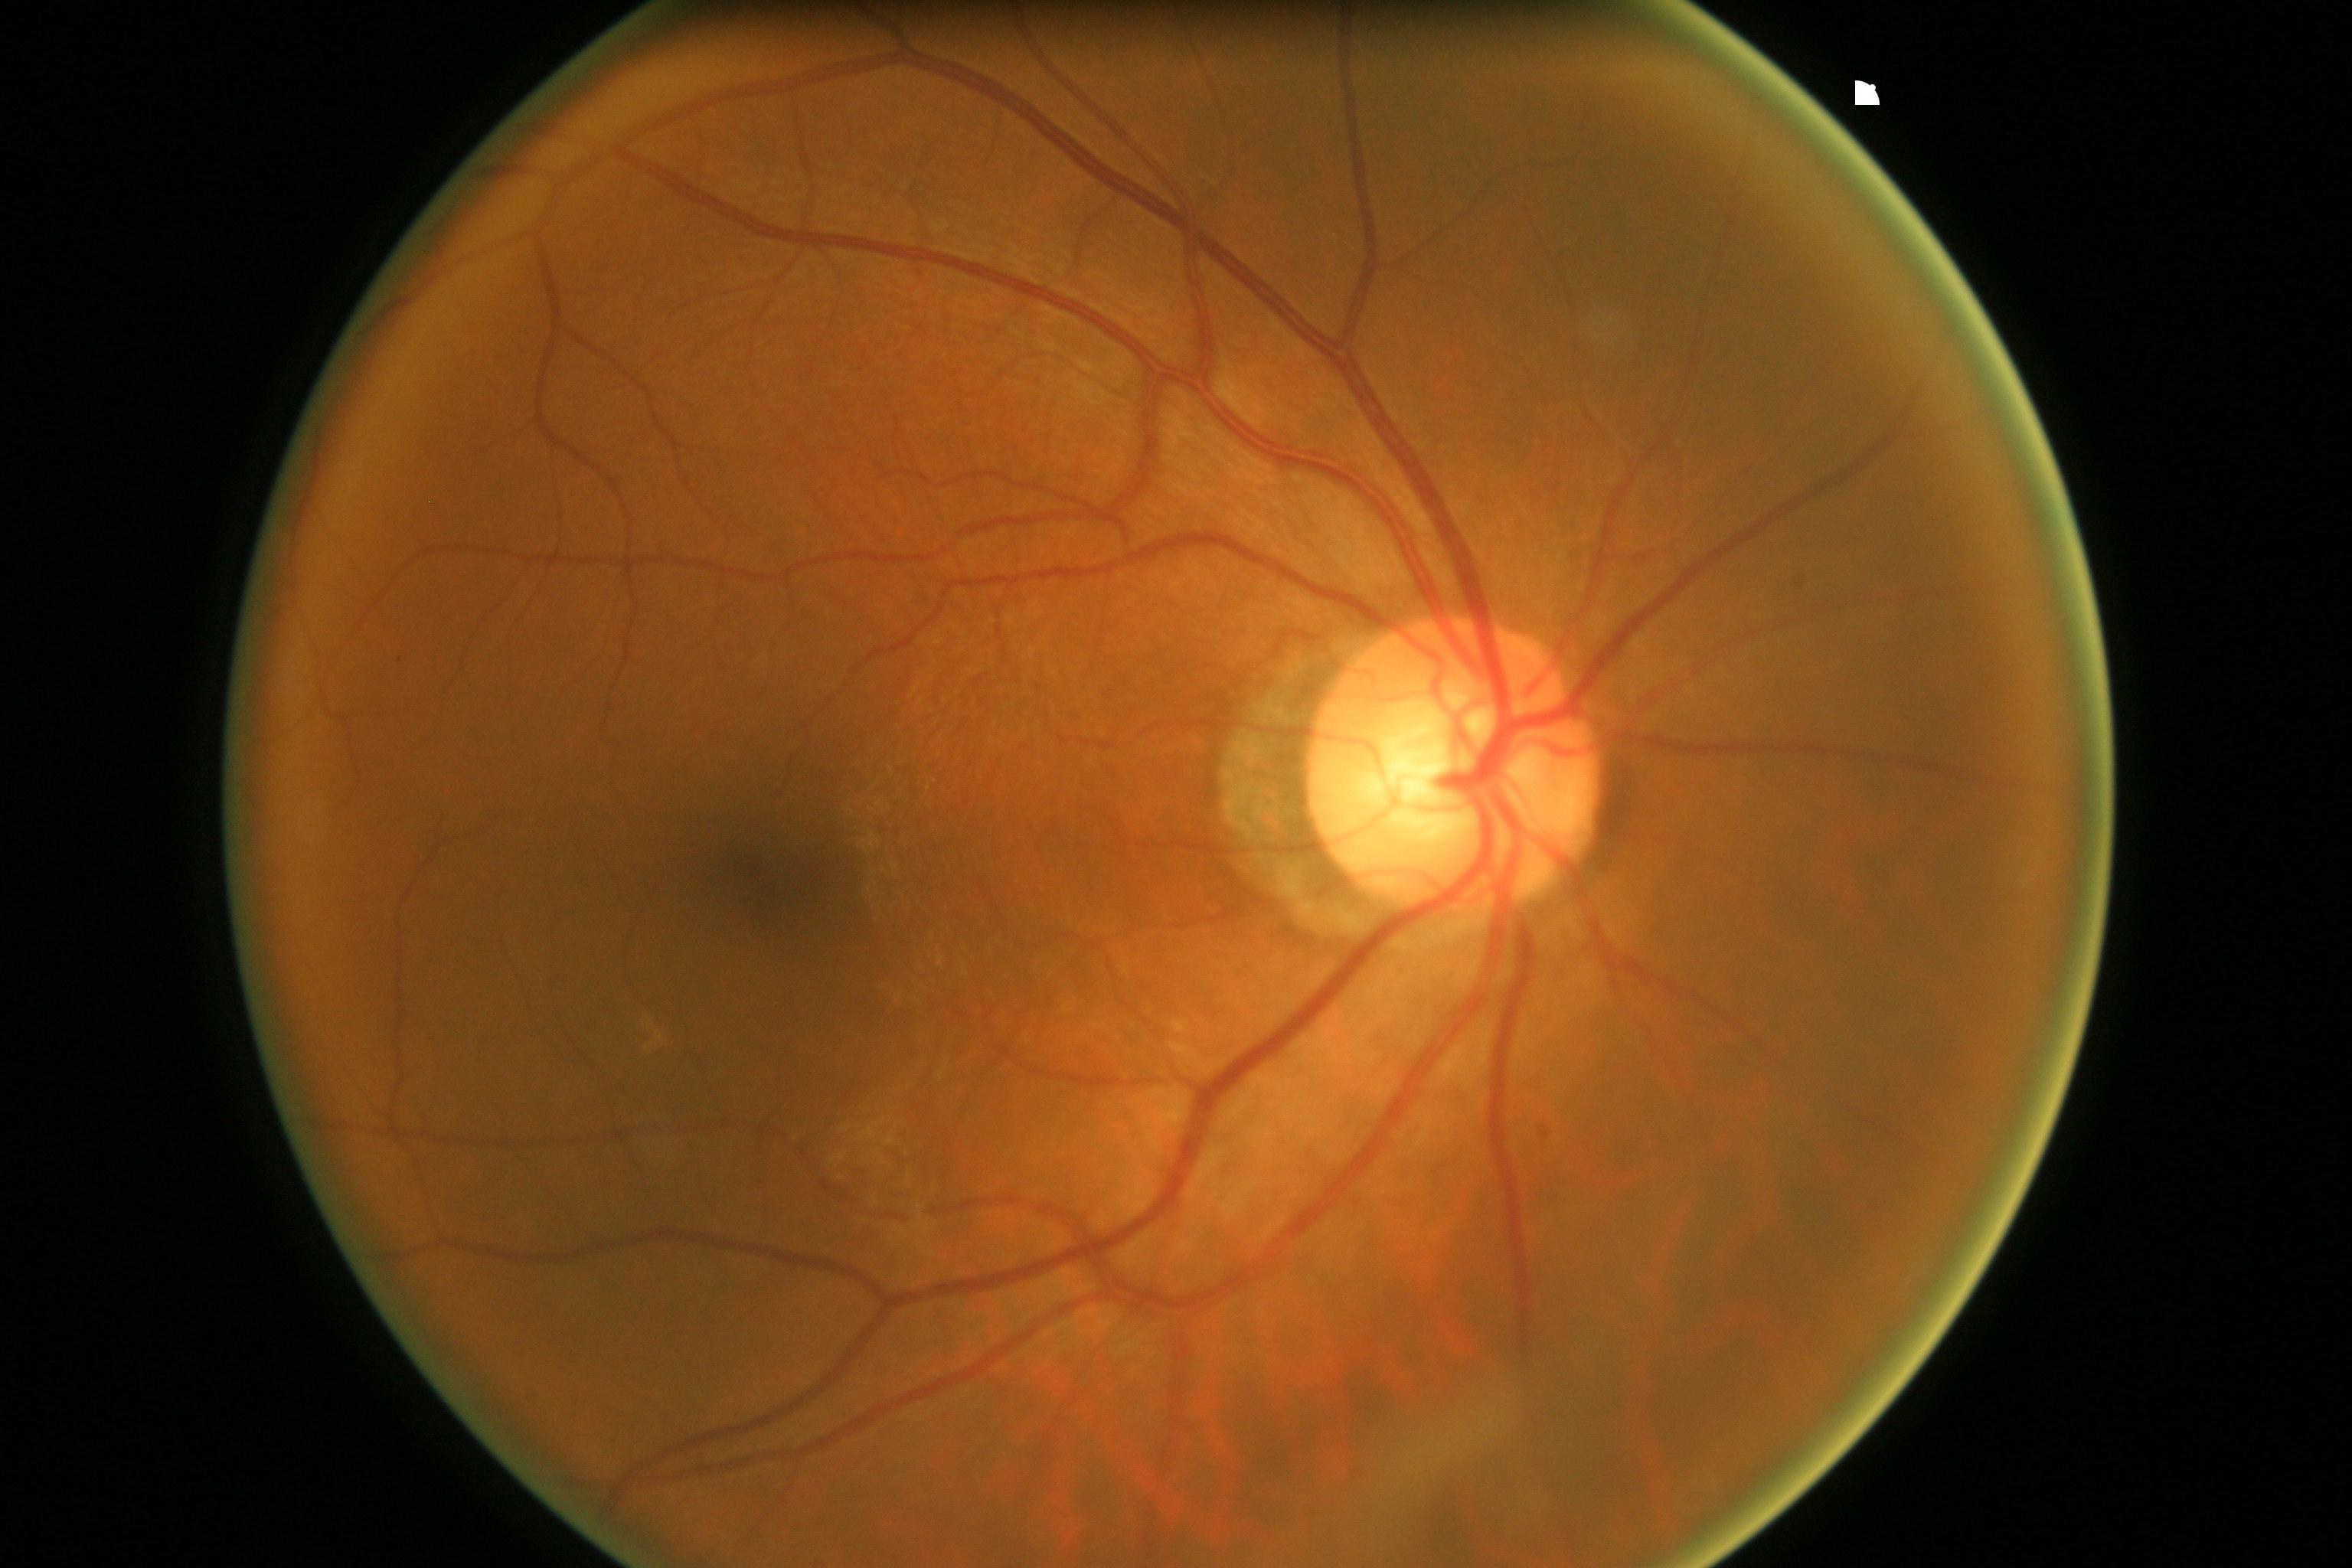

In [ ]:
from numpy import asarray

from PIL import Image
# load the image
image = Image.open(r'/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/394.jpg')
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
pixels = asarray(image)

In [ ]:

# global centering

# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean

mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)


# pixel normalization
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
mean = pixels.mean()
print('pixel mean = ', mean)

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)

Mean: 62.404
Min: 0.000, Max: 255.000
Mean: 0.000
Min: -62.404, Max: 192.596
[[[-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  ...
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]]

 [[-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  ...
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]]

 [[-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  ...
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]]

 ...

 [[-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.40370872]
  [-62.40370872 -60.40370872 -62.

**Visulization**

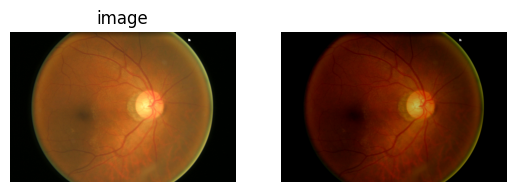

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(pixels)
ax1.axis('off')
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# **Modeling**

In [ ]:
TRAIN_DIR = r'/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'

TEST_DIR = r'/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

# **ConvNet**

# **ResNet50**

In [ ]:
# from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 20
BATCH_SIZE = 8

def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

base_model_1 = ResNet50(weights = None,
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)




resnet50_model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

adam = Adam()
resnet50_model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])

filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
# cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint]

print(train_generator.class_indices)

resnet50_model.summary()

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
1024
512
256
{'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )              

In [ ]:
history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 30,
                                       shuffle = True, validation_data = test_generator)



<ipython-input-17-e461442f2826>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 30,


Epoch 1/20
30/30 [==============================] - 250s 8s/step - loss: 578.6642 - accuracy: 0.6375 - val_loss: 156.7813 - val_accuracy: 0.7385
Epoch 2/20
30/30 [==============================] - 238s 8s/step - loss: 364.6415 - accuracy: 0.6417 - val_loss: 218.4812 - val_accuracy: 0.7385
Epoch 3/20
30/30 [==============================] - 226s 8s/step - loss: 211.8958 - accuracy: 0.6333 - val_loss: 21.5946 - val_accuracy: 0.7385
Epoch 4/20
30/30 [==============================] - 238s 8s/step - loss: 87.1989 - accuracy: 0.6625 - val_loss: 15.9431 - val_accuracy: 0.7385
Epoch 5/20
30/30 [==============================] - 232s 8s/step - loss: 31.6356 - accuracy: 0.6833 - val_loss: 2.9725 - val_accuracy: 0.7385
Epoch 6/20
30/30 [==============================] - 229s 8s/step - loss: 3.3058 - accuracy: 0.7208 - val_loss: 0.6859 - val_accuracy: 0.7385
Epoch 7/20
30/30 [==============================] - 232s 8s/step - loss: 0.8375 - accuracy: 0.7083 - val_loss: 0.6722 - val_accuracy: 0.7385

In [ ]:
from tensorflow.keras.applications import resnet50
resnet50_model = resnet50.ResNet50(weights='imagenet')
resnet50_model.save("model.h5")

102967424/102967424 [==============================] - 4s 0us/step


In [ ]:
from IPython.display import FileLink
FileLink(r'/content/model.h5')

/content/model.h5

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("/content/model.h5")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('No DR')
    else:
        print('DR')

1/1 [==============================] - 1s 1s/step
DR


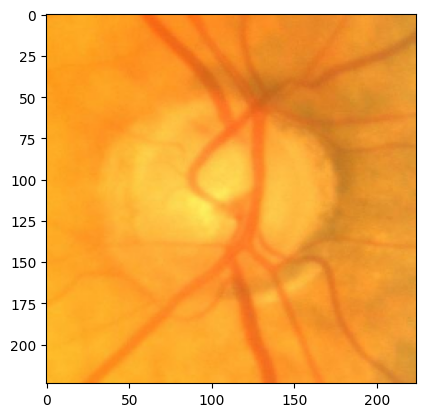

In [ ]:
predict_class('/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/ACRIMA/Images/Im003_ACRIMA.jpg')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/ML/Glaucoma Detection/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 0 images belonging to 0 classes.


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

image_batch, label_batch = train_generator.next()

print(len(image_batch))
for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

0
